In [27]:
import keras
import numpy as np

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


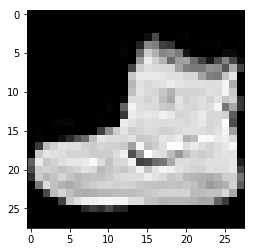

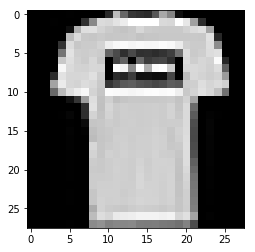

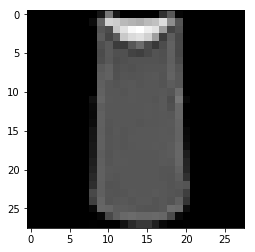

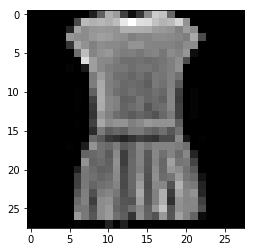

In [26]:
import cv2
import matplotlib.pyplot as plt

def display(i):
    plt.imshow(np.reshape(x_train[i], (28, 28)), cmap=plt.get_cmap('gray'))
    plt.show()

for i in range(4):
    display(i)

In [2]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [3]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)

Epoch 1/5
60000/60000 [==============================] - 14s 237us/step - loss: 1.0159 - acc: 0.6258
Epoch 2/5
60000/60000 [==============================] - 14s 241us/step - loss: 0.6714 - acc: 0.7488
Epoch 3/5
60000/60000 [==============================] - 14s 239us/step - loss: 0.6201 - acc: 0.7715
Epoch 4/5
60000/60000 [==============================] - 14s 239us/step - loss: 0.5879 - acc: 0.7851
Epoch 5/5
60000/60000 [==============================] - 14s 239us/step - loss: 0.5633 - acc: 0.7948


In [4]:
preds = model.predict(x_test)
preds = np.argmax(preds, 1)

with open('submission.csv', 'w') as f:
    f.write('Id,Class\n')
    for i, c in enumerate(preds):
        f.write('{},{}\n'.format(i, c))